In [1]:
import cvxpy as cp
import numpy as np
import osbdo as ob

(CVXPY) Oct 12 10:01:13 AM: Encountered unexpected exception importing solver SCS:
ImportError('dlopen(/opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/_scs_direct.cpython-310-darwin.so, 2): Symbol not found: _aligned_alloc\n  Referenced from: /opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/scs/.dylibs/libgomp.1.dylib (which was built for Mac OS X 10.15)\n  Expected in: /usr/lib/libSystem.B.dylib\n in /opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/scs/.dylibs/libgomp.1.dylib')


# Create parameters

In [2]:
params, R = ob.ra_params(num_resources=50, num_agents=50, num_participants=500)

# Distributed solution with limited memory $m$

In [3]:
agents = ob.ra_agents(params=params)
g = ob.ra_coupling(agents, R)
prob = ob.Problem(agents = agents, g = g)

In [4]:
max_iter = 50
memory = [20, 30, max_iter]
memory_bounds = {}
for m in memory:
    prob.solve(rel_gap= 10**(-10), abs_gap=10**(-10), max_iter=max_iter, memory=m)
    memory_bounds[m] = {'uk':prob.upper_bnd, 'lk':prob.lower_bnd}

/opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/cvxpy-1.3.0-py3.10-macosx-10.9-x86_64.egg/cvxpy/problems/problem.py:1358: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


k=0, rel_gap=243.1494336854923, L=-1128018.7147690903, U=-4620.197957215735
k=1, rel_gap=0.1998563310946641, L=-5543.573769875934, U=-4620.197957215735
k=2, rel_gap=0.09969973133984528, L=-5536.208194623798, U=-5034.290758513351
k=3, rel_gap=0.0636791675884615, L=-5533.486140583356, U=-5202.21351437078
k=4, rel_gap=0.04909378577974021, L=-5529.603426641897, U=-5270.838033352769
k=5, rel_gap=0.04318265224061053, L=-5527.609848536223, U=-5298.793875323453
k=6, rel_gap=0.04045962230527849, L=-5525.587836727348, U=-5310.718184800544
k=7, rel_gap=0.039230617964583055, L=-5523.159149578025, U=-5314.661687312078
k=8, rel_gap=0.03824261563753897, L=-5519.153047552107, U=-5315.860632596976
k=9, rel_gap=0.037048424821167894, L=-5512.804895603551, U=-5315.860632596976
k=10, rel_gap=0.03539756299348138, L=-5508.7581026018715, U=-5320.427920146219
k=11, rel_gap=0.03367562215106274, L=-5503.205304755458, U=-5323.919019492183
k=12, rel_gap=0.03284425754868547, L=-5498.779186936729, U=-5323.9190194921

k=6, rel_gap=0.04044822086278532, L=-5525.527927984935, U=-5310.718800982642
k=7, rel_gap=0.039228606203868026, L=-5523.157179095069, U=-5314.67007944504
k=8, rel_gap=0.03836974474192171, L=-5519.8059968053985, U=-5315.838625649962
k=9, rel_gap=0.0375240701629352, L=-5515.310527213692, U=-5315.838625649962
k=10, rel_gap=0.03653289920385312, L=-5512.367650059953, U=-5318.082671851446
k=11, rel_gap=0.03502042333329838, L=-5507.779585549468, U=-5321.421163663209
k=12, rel_gap=0.034046491782108536, L=-5503.693762058674, U=-5322.481924940757
k=13, rel_gap=0.03308108420509406, L=-5498.555397679814, U=-5322.481924940757
k=14, rel_gap=0.03216307872083585, L=-5493.669330082853, U=-5322.481924940757
k=15, rel_gap=0.030682821731800668, L=-5492.048647982953, U=-5328.553588149418
k=16, rel_gap=0.02829309654876751, L=-5481.7496621642595, U=-5330.921388622085
k=17, rel_gap=0.026418767932292253, L=-5475.873815287758, U=-5334.931498104655
k=18, rel_gap=0.025211328192767203, L=-5471.918933346226, U=-533

# Centralized solution

In [5]:
h_cvx = ob.cvx_resource_allocation(params=params, R=R)[0]

# Plot

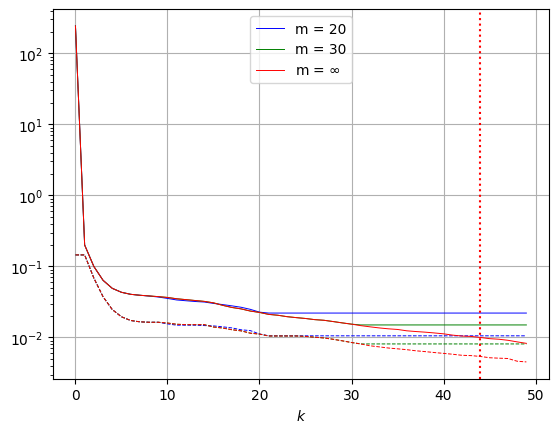

In [6]:
ob.plot_finite_memory(memory_bounds=memory_bounds, memory=memory, h_true=h_cvx)